In [125]:
import requests
import json
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.ticker as plticker
import numpy as np
from copy import deepcopy
from time import sleep
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
import cufflinks

In [ ]:
# All information is from theorangealliance.org but firstinspires 
# (https://ftc-events.firstinspires.org/) is more consistent in showing scores (in their gui)

In [111]:
fails = []
def get_api(suffix):
    content_type = "application/json"
    x_toa_key = "3e6aa6d227d6e8e7ed3ed2f82c762b482e08670f861f9fa9746ddd698a549cc3"
    x_application_origin = "DataAnalysis"

    endpoint = "https://theorangealliance.org/api"

    headers = {
        'Content-type': content_type,
        'X-TOA-Key': x_toa_key,
        'X-Application-Origin': x_application_origin
    }
    try:
        request = requests.get(f"{endpoint}/{suffix}", headers=headers)
        result = json.loads(request.text)
    except:
        print("Failure")
        print(request)
        fails.append(request)
    return result

In [115]:
# Grab a list of events that take place in Iowa
all_events = []
iowa_events = []
# Loop through all events
for event in get_api("event"):
    # Remove practice/scrimmage events
    if "scrimmage" in event['event_name'].lower(): continue
    if "practice" in event['event_name'].lower(): continue
    # Add to all region events
    if event['region_key']:
        all_events.append(event)
    # Add to iowa events
    if event['region_key'] == 'IA':
        iowa_events.append(event)

In [116]:
# Grab current time and event endtime and filter out events that havent occured
today = datetime.now()
all_matches = []
iowa_matches = []
errors = 0
for event in all_events:
    event_date = datetime.fromisoformat(event['end_date'].split('T')[0])
    if (event_date - today).days < 0: # Event has occured
        try:
            # Get match and add to all matches/iowa matches if relevent
            match = get_api(f"event/{event['event_key']}/matches")
            all_matches.append(match)
            if event in iowa_events:
                iowa_matches.append(match)
            print(match)
        except:
            # Catch and list errors
            print("Errored")
            errors += 1
        sleep(2)
print(f"Errors: {errors}")

# Persistently store match lists
%store all_matches
%store iowa_matches

[{'match_key': '2021-AUS-AFNC-Q001-1-11144', 'event_key': '2021-AUS-AFNC', 'tournament_level': 1, 'scheduled_time': None, 'match_name': 'Quals 1', 'play_number': 1, 'field_number': -1, 'prestart_time': None, 'match_start_time': None, 'prestart_count': None, 'cycle_time': None, 'red_score': 150, 'blue_score': -1, 'red_penalty': 0, 'blue_penalty': -1, 'red_auto_score': 15, 'blue_auto_score': -1, 'red_tele_score': 70, 'blue_tele_score': -1, 'red_end_score': 65, 'blue_end_score': -1, 'video_url': None, 'participants': [{'match_participant_key': '2021-AUS-AFNC-Q001-1-11144-R1', 'match_key': '2021-AUS-AFNC-Q001-1-11144', 'team_key': '11144', 'station': 11, 'station_status': 1, 'ref_status': 0, 'team': {'team_key': '11144', 'region_key': 'AUS', 'league_key': None, 'team_number': 11144, 'team_name_short': 'Barker Bluebacks', 'team_name_long': 'Barker College', 'robot_name': None, 'last_active': '2021', 'city': 'Hornsby', 'state_prov': 'NSW', 'zip_code': '2077', 'country': 'Australia', 'rookie_

[{'match_key': '2021-AUS-AFQT0-Q001-1', 'event_key': '2021-AUS-AFQT0', 'tournament_level': 1, 'scheduled_time': '2020-11-08T15:48:29.000Z', 'match_name': 'Quals 1', 'play_number': 1, 'field_number': -1, 'prestart_time': None, 'match_start_time': None, 'prestart_count': None, 'cycle_time': None, 'red_score': 0, 'blue_score': 0, 'red_penalty': 3, 'blue_penalty': 0, 'red_auto_score': 0, 'blue_auto_score': 0, 'red_tele_score': 0, 'blue_tele_score': 0, 'red_end_score': -3, 'blue_end_score': 0, 'video_url': None, 'participants': [{'match_participant_key': '2021-AUS-AFQT0-Q001-1-R1', 'match_key': '2021-AUS-AFQT0-Q001-1', 'team_key': '11148', 'station': 11, 'station_status': 1, 'ref_status': 0, 'team': {'team_key': '11148', 'region_key': 'AUS', 'league_key': None, 'team_number': 11148, 'team_name_short': 'Barker Greybacks', 'team_name_long': 'Barker College', 'robot_name': None, 'last_active': '2021', 'city': 'Hornsby', 'state_prov': 'NSW', 'zip_code': '2077', 'country': 'Australia', 'rookie_y

[{'match_key': '2021-AUS-AFQT1-Q001-1', 'event_key': '2021-AUS-AFQT1', 'tournament_level': 1, 'scheduled_time': '2020-11-07T14:45:32.000Z', 'match_name': 'Quals 1', 'play_number': 1, 'field_number': -1, 'prestart_time': None, 'match_start_time': None, 'prestart_count': None, 'cycle_time': None, 'red_score': 0, 'blue_score': 0, 'red_penalty': 2, 'blue_penalty': 1, 'red_auto_score': 0, 'blue_auto_score': 0, 'red_tele_score': 0, 'blue_tele_score': 0, 'red_end_score': -2, 'blue_end_score': -1, 'video_url': None, 'participants': [{'match_participant_key': '2021-AUS-AFQT1-Q001-1-R1', 'match_key': '2021-AUS-AFQT1-Q001-1', 'team_key': '14380', 'station': 11, 'station_status': 1, 'ref_status': 0, 'team': {'team_key': '14380', 'region_key': 'AUS', 'league_key': None, 'team_number': 14380, 'team_name_short': 'BotBuilders X', 'team_name_long': 'Building Block Studio&Family/Community', 'robot_name': None, 'last_active': '2021', 'city': 'Clayfield', 'state_prov': 'QLD', 'zip_code': '4011', 'country'

[]
[]
[{'match_key': '2021-AZ-AFCWQ-Q001-1-11980', 'event_key': '2021-AZ-AFCWQ', 'tournament_level': 1, 'scheduled_time': '2020-12-12T14:58:05.000Z', 'match_name': 'Quals 1', 'play_number': 1, 'field_number': -1, 'prestart_time': None, 'match_start_time': None, 'prestart_count': None, 'cycle_time': None, 'red_score': 24, 'blue_score': -1, 'red_penalty': 0, 'blue_penalty': -1, 'red_auto_score': 20, 'blue_auto_score': -1, 'red_tele_score': 4, 'blue_tele_score': -1, 'red_end_score': 0, 'blue_end_score': -1, 'video_url': None, 'participants': [{'match_participant_key': '2021-AZ-AFCWQ-Q001-1-11980-R1', 'match_key': '2021-AZ-AFCWQ-Q001-1-11980', 'team_key': '11980', 'station': 11, 'station_status': 1, 'ref_status': 0, 'team': {'team_key': '11980', 'region_key': 'AZ', 'league_key': None, 'team_number': 11980, 'team_name_short': 'Team Viper', 'team_name_long': 'San Miguel Cristo Rey Cath HS', 'robot_name': None, 'last_active': '2021', 'city': 'Tucson', 'state_prov': 'AZ', 'zip_code': '85756', 

[{'match_key': '2021-BC-BFLM1-Q001-1-13459', 'event_key': '2021-BC-BFLM1', 'tournament_level': 1, 'scheduled_time': '2020-11-28T17:35:17.000Z', 'match_name': 'Quals 1', 'play_number': 1, 'field_number': -1, 'prestart_time': None, 'match_start_time': None, 'prestart_count': None, 'cycle_time': None, 'red_score': 8, 'blue_score': -1, 'red_penalty': 0, 'blue_penalty': -1, 'red_auto_score': 8, 'blue_auto_score': -1, 'red_tele_score': 0, 'blue_tele_score': -1, 'red_end_score': 0, 'blue_end_score': -1, 'video_url': None, 'participants': [{'match_participant_key': '2021-BC-BFLM1-Q001-1-13459-R1', 'match_key': '2021-BC-BFLM1-Q001-1-13459', 'team_key': '13459', 'station': 11, 'station_status': 1, 'ref_status': 0, 'team': {'team_key': '13459', 'region_key': 'BC', 'league_key': None, 'team_number': 13459, 'team_name_short': "Dudley's Crew", 'team_name_long': "St. Margaret's School", 'robot_name': None, 'last_active': '1920', 'city': 'Victoria', 'state_prov': 'BC', 'zip_code': 'v8x3p7', 'country':

[]
[]
[{'match_key': '2021-FL-FFALM-Q001-1-10179', 'event_key': '2021-FL-FFALM', 'tournament_level': 1, 'scheduled_time': '2020-12-12T16:07:07.000Z', 'match_name': 'Quals 1', 'play_number': 1, 'field_number': -1, 'prestart_time': None, 'match_start_time': None, 'prestart_count': None, 'cycle_time': None, 'red_score': 33, 'blue_score': -1, 'red_penalty': 0, 'blue_penalty': -1, 'red_auto_score': 12, 'blue_auto_score': -1, 'red_tele_score': 6, 'blue_tele_score': -1, 'red_end_score': 15, 'blue_end_score': -1, 'video_url': None, 'participants': [{'match_participant_key': '2021-FL-FFALM-Q001-1-10179-R1', 'match_key': '2021-FL-FFALM-Q001-1-10179', 'team_key': '10179', 'station': 11, 'station_status': 1, 'ref_status': 0, 'team': {'team_key': '10179', 'region_key': 'FL', 'league_key': None, 'team_number': 10179, 'team_name_short': 'Tech Turtles', 'team_name_long': 'ECRA- Emerald Coast Robotics Alliance/DOD/ASEI & Family/Community', 'robot_name': None, 'last_active': '2021', 'city': 'Niceville',

[{'match_key': '2021-FL-FFGCL-Q001-1-13093', 'event_key': '2021-FL-FFGCL', 'tournament_level': 1, 'scheduled_time': None, 'match_name': 'Quals 1', 'play_number': 1, 'field_number': -1, 'prestart_time': None, 'match_start_time': None, 'prestart_count': None, 'cycle_time': None, 'red_score': 0, 'blue_score': -1, 'red_penalty': 0, 'blue_penalty': -1, 'red_auto_score': 0, 'blue_auto_score': -1, 'red_tele_score': 0, 'blue_tele_score': -1, 'red_end_score': 0, 'blue_end_score': -1, 'video_url': None, 'participants': [{'match_participant_key': '2021-FL-FFGCL-Q001-1-13093-R1', 'match_key': '2021-FL-FFGCL-Q001-1-13093', 'team_key': '13093', 'station': 11, 'station_status': 1, 'ref_status': 0, 'team': {'team_key': '13093', 'region_key': 'FL', 'league_key': None, 'team_number': 13093, 'team_name_short': 'Golden Fish', 'team_name_long': 'Charlotte High School', 'robot_name': None, 'last_active': '1920', 'city': 'Punta Gorda', 'state_prov': 'FL', 'zip_code': '33950', 'country': 'USA', 'rookie_year':

[{'match_key': '2021-FL-FFNFL-Q001-1-10276', 'event_key': '2021-FL-FFNFL', 'tournament_level': 1, 'scheduled_time': '2020-12-10T17:31:49.000Z', 'match_name': 'Quals 1', 'play_number': 1, 'field_number': -1, 'prestart_time': None, 'match_start_time': None, 'prestart_count': None, 'cycle_time': None, 'red_score': 0, 'blue_score': -1, 'red_penalty': 0, 'blue_penalty': -1, 'red_auto_score': 0, 'blue_auto_score': -1, 'red_tele_score': 0, 'blue_tele_score': -1, 'red_end_score': 0, 'blue_end_score': -1, 'video_url': None, 'participants': [{'match_participant_key': '2021-FL-FFNFL-Q001-1-10276-R1', 'match_key': '2021-FL-FFNFL-Q001-1-10276', 'team_key': '10276', 'station': 11, 'station_status': 1, 'ref_status': 0, 'team': {'team_key': '10276', 'region_key': 'FL', 'league_key': None, 'team_number': 10276, 'team_name_short': 'Storm Troopers', 'team_name_long': 'Baymeadows Moving and Storage &San Jose Preparatory High School', 'robot_name': None, 'last_active': '2021', 'city': 'Jacksonville', 'stat

[{'match_key': '2021-FL-FFOLM-Q001-1-10168', 'event_key': '2021-FL-FFOLM', 'tournament_level': 1, 'scheduled_time': '2020-12-12T10:29:07.000Z', 'match_name': 'Quals 1', 'play_number': 1, 'field_number': -1, 'prestart_time': None, 'match_start_time': None, 'prestart_count': None, 'cycle_time': None, 'red_score': 65, 'blue_score': -1, 'red_penalty': 0, 'blue_penalty': -1, 'red_auto_score': 5, 'blue_auto_score': -1, 'red_tele_score': 60, 'blue_tele_score': -1, 'red_end_score': 0, 'blue_end_score': -1, 'video_url': None, 'participants': [{'match_participant_key': '2021-FL-FFOLM-Q001-1-10168-R1', 'match_key': '2021-FL-FFOLM-Q001-1-10168', 'team_key': '10168', 'station': 11, 'station_status': 1, 'ref_status': 0, 'team': {'team_key': '10168', 'region_key': 'FL', 'league_key': None, 'team_number': 10168, 'team_name_short': 'LJH Gator Techs', 'team_name_long': 'Lakeside Junior High School', 'robot_name': None, 'last_active': '1920', 'city': 'Orange Park', 'state_prov': 'FL', 'zip_code': '32073'

[{'match_key': '2021-FL-FFRLM-Q001-1-11434', 'event_key': '2021-FL-FFRLM', 'tournament_level': 1, 'scheduled_time': None, 'match_name': 'Quals 1', 'play_number': 1, 'field_number': -1, 'prestart_time': None, 'match_start_time': None, 'prestart_count': None, 'cycle_time': None, 'red_score': 0, 'blue_score': -1, 'red_penalty': 0, 'blue_penalty': -1, 'red_auto_score': 0, 'blue_auto_score': -1, 'red_tele_score': 0, 'blue_tele_score': -1, 'red_end_score': 0, 'blue_end_score': -1, 'video_url': None, 'participants': [{'match_participant_key': '2021-FL-FFRLM-Q001-1-11434-R1', 'match_key': '2021-FL-FFRLM-Q001-1-11434', 'team_key': '11434', 'station': 11, 'station_status': 1, 'ref_status': 0, 'team': {'team_key': '11434', 'region_key': 'FL', 'league_key': None, 'team_number': 11434, 'team_name_short': 'JagWires', 'team_name_long': 'Academy of the Holy Names High School', 'robot_name': None, 'last_active': '2021', 'city': 'Tampa', 'state_prov': 'FL', 'zip_code': '33629', 'country': 'USA', 'rookie

[{'match_key': '2021-FL-FFSCL-Q001-1-14538', 'event_key': '2021-FL-FFSCL', 'tournament_level': 1, 'scheduled_time': None, 'match_name': 'Quals 1', 'play_number': 1, 'field_number': -1, 'prestart_time': None, 'match_start_time': None, 'prestart_count': None, 'cycle_time': None, 'red_score': 0, 'blue_score': -1, 'red_penalty': 0, 'blue_penalty': -1, 'red_auto_score': 0, 'blue_auto_score': -1, 'red_tele_score': 0, 'blue_tele_score': -1, 'red_end_score': 0, 'blue_end_score': -1, 'video_url': None, 'participants': [{'match_participant_key': '2021-FL-FFSCL-Q001-1-14538-R1', 'match_key': '2021-FL-FFSCL-Q001-1-14538', 'team_key': '14538', 'station': 11, 'station_status': 1, 'ref_status': 0, 'team': {'team_key': '14538', 'region_key': 'FL', 'league_key': None, 'team_number': 14538, 'team_name_short': 'Infinity Robotics - Iron Eagles', 'team_name_long': 'Infinity Robotics/Collins Aerospace/Viera High School - FRC 7431 WINGSPAN/Viera Charter School/Lockheed Martin/Infinity Engineering/The Viera C

[{'match_key': '2021-FL-FFSFL-Q001-1-10022', 'event_key': '2021-FL-FFSFL', 'tournament_level': 1, 'scheduled_time': '2020-12-11T16:29:54.000Z', 'match_name': 'Quals 1', 'play_number': 1, 'field_number': -1, 'prestart_time': None, 'match_start_time': None, 'prestart_count': None, 'cycle_time': None, 'red_score': 15, 'blue_score': -1, 'red_penalty': 1, 'blue_penalty': -1, 'red_auto_score': 5, 'blue_auto_score': -1, 'red_tele_score': 0, 'blue_tele_score': -1, 'red_end_score': 9, 'blue_end_score': -1, 'video_url': None, 'participants': [{'match_participant_key': '2021-FL-FFSFL-Q001-1-10022-R1', 'match_key': '2021-FL-FFSFL-Q001-1-10022', 'team_key': '10022', 'station': 11, 'station_status': 1, 'ref_status': 0, 'team': {'team_key': '10022', 'region_key': 'FL', 'league_key': None, 'team_number': 10022, 'team_name_short': 'WiredCats Gen 3', 'team_name_long': 'Business Light Engineering of the Motorola Solutions Inc. / Motorola Solutions Foundation & Western High School', 'robot_name': None, 'l

[{'match_key': '2021-FL-FFTLM-Q001-1-10650', 'event_key': '2021-FL-FFTLM', 'tournament_level': 1, 'scheduled_time': None, 'match_name': 'Quals 1', 'play_number': 1, 'field_number': -1, 'prestart_time': None, 'match_start_time': None, 'prestart_count': None, 'cycle_time': None, 'red_score': 56, 'blue_score': -1, 'red_penalty': 0, 'blue_penalty': -1, 'red_auto_score': 24, 'blue_auto_score': -1, 'red_tele_score': 12, 'blue_tele_score': -1, 'red_end_score': 20, 'blue_end_score': -1, 'video_url': None, 'participants': [{'match_participant_key': '2021-FL-FFTLM-Q001-1-10650-R1', 'match_key': '2021-FL-FFTLM-Q001-1-10650', 'team_key': '10650', 'station': 11, 'station_status': 1, 'ref_status': 0, 'team': {'team_key': '10650', 'region_key': 'FL', 'league_key': None, 'team_number': 10650, 'team_name_short': 'Hazmat Robotics Biohazards', 'team_name_long': 'Lake Highland Preparatory School', 'robot_name': None, 'last_active': '2021', 'city': 'Orlando', 'state_prov': 'FL', 'zip_code': '32803', 'count

[{'match_key': '2021-GA-GFALT-Q001-1-12212', 'event_key': '2021-GA-GFALT', 'tournament_level': 1, 'scheduled_time': '2020-12-17T18:06:46.000Z', 'match_name': 'Quals 1', 'play_number': 1, 'field_number': -1, 'prestart_time': None, 'match_start_time': None, 'prestart_count': None, 'cycle_time': None, 'red_score': 45, 'blue_score': -1, 'red_penalty': 0, 'blue_penalty': -1, 'red_auto_score': 5, 'blue_auto_score': -1, 'red_tele_score': 0, 'blue_tele_score': -1, 'red_end_score': 40, 'blue_end_score': -1, 'video_url': None, 'participants': [{'match_participant_key': '2021-GA-GFALT-Q001-1-12212-R1', 'match_key': '2021-GA-GFALT-Q001-1-12212', 'team_key': '12212', 'station': 11, 'station_status': 1, 'ref_status': 0, 'team': {'team_key': '12212', 'region_key': 'GA', 'league_key': None, 'team_number': 12212, 'team_name_short': 'SpartaBots I', 'team_name_long': 'North Springs Charter High Sch', 'robot_name': None, 'last_active': '2021', 'city': 'Atlanta', 'state_prov': 'GA', 'zip_code': '30328', 'c

[{'match_key': '2021-GA-GFAMR-Q001-1-12212', 'event_key': '2021-GA-GFAMR', 'tournament_level': 1, 'scheduled_time': None, 'match_name': 'Quals 1', 'play_number': 1, 'field_number': -1, 'prestart_time': None, 'match_start_time': None, 'prestart_count': None, 'cycle_time': None, 'red_score': 0, 'blue_score': -1, 'red_penalty': 0, 'blue_penalty': -1, 'red_auto_score': 0, 'blue_auto_score': -1, 'red_tele_score': 0, 'blue_tele_score': -1, 'red_end_score': 0, 'blue_end_score': -1, 'video_url': None, 'participants': [{'match_participant_key': '2021-GA-GFAMR-Q001-1-12212-R1', 'match_key': '2021-GA-GFAMR-Q001-1-12212', 'team_key': '12212', 'station': 11, 'station_status': 1, 'ref_status': 0, 'team': {'team_key': '12212', 'region_key': 'GA', 'league_key': None, 'team_number': 12212, 'team_name_short': 'SpartaBots I', 'team_name_long': 'North Springs Charter High Sch', 'robot_name': None, 'last_active': '2021', 'city': 'Atlanta', 'state_prov': 'GA', 'zip_code': '30328', 'country': 'USA', 'rookie_

[{'match_key': '2021-GA-GFAMR1-Q001-1-12212', 'event_key': '2021-GA-GFAMR1', 'tournament_level': 1, 'scheduled_time': '2020-11-19T16:49:51.000Z', 'match_name': 'Quals 1', 'play_number': 1, 'field_number': -1, 'prestart_time': None, 'match_start_time': None, 'prestart_count': None, 'cycle_time': None, 'red_score': 45, 'blue_score': -1, 'red_penalty': 0, 'blue_penalty': -1, 'red_auto_score': 5, 'blue_auto_score': -1, 'red_tele_score': 0, 'blue_tele_score': -1, 'red_end_score': 40, 'blue_end_score': -1, 'video_url': None, 'participants': [{'match_participant_key': '2021-GA-GFAMR1-Q001-1-12212-R1', 'match_key': '2021-GA-GFAMR1-Q001-1-12212', 'team_key': '12212', 'station': 11, 'station_status': 1, 'ref_status': 0, 'team': {'team_key': '12212', 'region_key': 'GA', 'league_key': None, 'team_number': 12212, 'team_name_short': 'SpartaBots I', 'team_name_long': 'North Springs Charter High Sch', 'robot_name': None, 'last_active': '2021', 'city': 'Atlanta', 'state_prov': 'GA', 'zip_code': '30328'

[{'match_key': '2021-GA-GFAMR2-Q001-1-12212', 'event_key': '2021-GA-GFAMR2', 'tournament_level': 1, 'scheduled_time': None, 'match_name': 'Quals 1', 'play_number': 1, 'field_number': -1, 'prestart_time': None, 'match_start_time': None, 'prestart_count': None, 'cycle_time': None, 'red_score': 0, 'blue_score': -1, 'red_penalty': 0, 'blue_penalty': -1, 'red_auto_score': 0, 'blue_auto_score': -1, 'red_tele_score': 0, 'blue_tele_score': -1, 'red_end_score': 0, 'blue_end_score': -1, 'video_url': None, 'participants': [{'match_participant_key': '2021-GA-GFAMR2-Q001-1-12212-R1', 'match_key': '2021-GA-GFAMR2-Q001-1-12212', 'team_key': '12212', 'station': 11, 'station_status': 1, 'ref_status': 0, 'team': {'team_key': '12212', 'region_key': 'GA', 'league_key': None, 'team_number': 12212, 'team_name_short': 'SpartaBots I', 'team_name_long': 'North Springs Charter High Sch', 'robot_name': None, 'last_active': '2021', 'city': 'Atlanta', 'state_prov': 'GA', 'zip_code': '30328', 'country': 'USA', 'roo

[{'match_key': '2021-GA-GFAMR3-Q001-1-12212', 'event_key': '2021-GA-GFAMR3', 'tournament_level': 1, 'scheduled_time': '2020-12-03T16:53:51.000Z', 'match_name': 'Quals 1', 'play_number': 1, 'field_number': -1, 'prestart_time': None, 'match_start_time': None, 'prestart_count': None, 'cycle_time': None, 'red_score': 45, 'blue_score': -1, 'red_penalty': 0, 'blue_penalty': -1, 'red_auto_score': 5, 'blue_auto_score': -1, 'red_tele_score': 0, 'blue_tele_score': -1, 'red_end_score': 40, 'blue_end_score': -1, 'video_url': None, 'participants': [{'match_participant_key': '2021-GA-GFAMR3-Q001-1-12212-R1', 'match_key': '2021-GA-GFAMR3-Q001-1-12212', 'team_key': '12212', 'station': 11, 'station_status': 1, 'ref_status': 0, 'team': {'team_key': '12212', 'region_key': 'GA', 'league_key': None, 'team_number': 12212, 'team_name_short': 'SpartaBots I', 'team_name_long': 'North Springs Charter High Sch', 'robot_name': None, 'last_active': '2021', 'city': 'Atlanta', 'state_prov': 'GA', 'zip_code': '30328'

[{'match_key': '2021-GA-GFAMR4-Q001-1-12212', 'event_key': '2021-GA-GFAMR4', 'tournament_level': 1, 'scheduled_time': None, 'match_name': 'Quals 1', 'play_number': 1, 'field_number': -1, 'prestart_time': None, 'match_start_time': None, 'prestart_count': None, 'cycle_time': None, 'red_score': 0, 'blue_score': -1, 'red_penalty': 0, 'blue_penalty': -1, 'red_auto_score': 0, 'blue_auto_score': -1, 'red_tele_score': 0, 'blue_tele_score': -1, 'red_end_score': 0, 'blue_end_score': -1, 'video_url': None, 'participants': [{'match_participant_key': '2021-GA-GFAMR4-Q001-1-12212-R1', 'match_key': '2021-GA-GFAMR4-Q001-1-12212', 'team_key': '12212', 'station': 11, 'station_status': 1, 'ref_status': 0, 'team': {'team_key': '12212', 'region_key': 'GA', 'league_key': None, 'team_number': 12212, 'team_name_short': 'SpartaBots I', 'team_name_long': 'North Springs Charter High Sch', 'robot_name': None, 'last_active': '2021', 'city': 'Atlanta', 'state_prov': 'GA', 'zip_code': '30328', 'country': 'USA', 'roo

[{'match_key': '2021-GA-GFDMR1-Q001-1-11127', 'event_key': '2021-GA-GFDMR1', 'tournament_level': 1, 'scheduled_time': None, 'match_name': 'Quals 1', 'play_number': 1, 'field_number': -1, 'prestart_time': None, 'match_start_time': None, 'prestart_count': None, 'cycle_time': None, 'red_score': 0, 'blue_score': -1, 'red_penalty': 0, 'blue_penalty': -1, 'red_auto_score': 0, 'blue_auto_score': -1, 'red_tele_score': 0, 'blue_tele_score': -1, 'red_end_score': 0, 'blue_end_score': -1, 'video_url': None, 'participants': [{'match_participant_key': '2021-GA-GFDMR1-Q001-1-11127-R1', 'match_key': '2021-GA-GFDMR1-Q001-1-11127', 'team_key': '11127', 'station': 11, 'station_status': 1, 'ref_status': 0, 'team': {'team_key': '11127', 'region_key': 'GA', 'league_key': None, 'team_number': 11127, 'team_name_short': 'Whitefield Robotics', 'team_name_long': 'Whitefield Academy', 'robot_name': None, 'last_active': '2021', 'city': 'Mableton', 'state_prov': 'GA', 'zip_code': '30126', 'country': 'USA', 'rookie_

[{'match_key': '2021-GA-GFDMR2-Q001-1-11127', 'event_key': '2021-GA-GFDMR2', 'tournament_level': 1, 'scheduled_time': None, 'match_name': 'Quals 1', 'play_number': 1, 'field_number': -1, 'prestart_time': None, 'match_start_time': None, 'prestart_count': None, 'cycle_time': None, 'red_score': 0, 'blue_score': -1, 'red_penalty': 0, 'blue_penalty': -1, 'red_auto_score': 0, 'blue_auto_score': -1, 'red_tele_score': 0, 'blue_tele_score': -1, 'red_end_score': 0, 'blue_end_score': -1, 'video_url': None, 'participants': [{'match_participant_key': '2021-GA-GFDMR2-Q001-1-11127-R1', 'match_key': '2021-GA-GFDMR2-Q001-1-11127', 'team_key': '11127', 'station': 11, 'station_status': 1, 'ref_status': 0, 'team': {'team_key': '11127', 'region_key': 'GA', 'league_key': None, 'team_number': 11127, 'team_name_short': 'Whitefield Robotics', 'team_name_long': 'Whitefield Academy', 'robot_name': None, 'last_active': '2021', 'city': 'Mableton', 'state_prov': 'GA', 'zip_code': '30126', 'country': 'USA', 'rookie_

[]
[{'match_key': '2021-GA-GFEM1-Q001-1', 'event_key': '2021-GA-GFEM1', 'tournament_level': 1, 'scheduled_time': '2020-10-24T15:36:23.000Z', 'match_name': 'Quals 1', 'play_number': 1, 'field_number': -1, 'prestart_time': None, 'match_start_time': None, 'prestart_count': None, 'cycle_time': None, 'red_score': 0, 'blue_score': 16, 'red_penalty': 0, 'blue_penalty': 0, 'red_auto_score': 0, 'blue_auto_score': 5, 'red_tele_score': 0, 'blue_tele_score': 6, 'red_end_score': 0, 'blue_end_score': 5, 'video_url': None, 'participants': [{'match_participant_key': '2021-GA-GFEM1-Q001-1-R1', 'match_key': '2021-GA-GFEM1-Q001-1', 'team_key': '10068', 'station': 11, 'station_status': 1, 'ref_status': 0, 'team': {'team_key': '10068', 'region_key': 'GA', 'league_key': None, 'team_number': 10068, 'team_name_short': 'Duct-Ties & Zip-Tape', 'team_name_long': 'Family/Community', 'robot_name': None, 'last_active': '2021', 'city': 'Canton', 'state_prov': 'GA', 'zip_code': '30114', 'country': 'USA', 'rookie_year

[{'match_key': '2021-GA-GFEM2-Q001-1', 'event_key': '2021-GA-GFEM2', 'tournament_level': 1, 'scheduled_time': '2020-11-14T10:38:05.000Z', 'match_name': 'Quals 1', 'play_number': 1, 'field_number': -1, 'prestart_time': None, 'match_start_time': None, 'prestart_count': None, 'cycle_time': None, 'red_score': 28, 'blue_score': 27, 'red_penalty': 0, 'blue_penalty': 0, 'red_auto_score': 0, 'blue_auto_score': 5, 'red_tele_score': 8, 'blue_tele_score': 22, 'red_end_score': 20, 'blue_end_score': 0, 'video_url': None, 'participants': [{'match_participant_key': '2021-GA-GFEM2-Q001-1-R1', 'match_key': '2021-GA-GFEM2-Q001-1', 'team_key': '11364', 'station': 11, 'station_status': 1, 'ref_status': 0, 'team': {'team_key': '11364', 'region_key': 'GA', 'league_key': None, 'team_number': 11364, 'team_name_short': 'Eagle Robotics - Diamond Plate', 'team_name_long': 'Lockheed Martin/Win-Tech, Inc./Howell, Rusk, Dodsen Architects/Brasfield & Gorrie, General Contractors/Beko Technologies, Inc./CKS Packaging,

[{'match_key': '2021-GA-GFEM3-Q001-1', 'event_key': '2021-GA-GFEM3', 'tournament_level': 1, 'scheduled_time': '2020-12-05T11:01:47.000Z', 'match_name': 'Quals 1', 'play_number': 1, 'field_number': -1, 'prestart_time': None, 'match_start_time': None, 'prestart_count': None, 'cycle_time': None, 'red_score': 4, 'blue_score': 14, 'red_penalty': 0, 'blue_penalty': 1, 'red_auto_score': 0, 'blue_auto_score': 0, 'red_tele_score': 4, 'blue_tele_score': 4, 'red_end_score': 0, 'blue_end_score': 9, 'video_url': None, 'participants': [{'match_participant_key': '2021-GA-GFEM3-Q001-1-R1', 'match_key': '2021-GA-GFEM3-Q001-1', 'team_key': '11750', 'station': 11, 'station_status': 1, 'ref_status': 0, 'team': {'team_key': '11750', 'region_key': 'GA', 'league_key': None, 'team_number': 11750, 'team_name_short': 'Bellatorum', 'team_name_long': 'Shaw Industries & Cartersville High School', 'robot_name': None, 'last_active': '2021', 'city': 'Cartersville', 'state_prov': 'GA', 'zip_code': '30120', 'country': 

[{'match_key': '2021-GA-GFGMR-Q001-1-112', 'event_key': '2021-GA-GFGMR', 'tournament_level': 1, 'scheduled_time': '2020-11-14T10:21:01.000Z', 'match_name': 'Quals 1', 'play_number': 1, 'field_number': -1, 'prestart_time': None, 'match_start_time': None, 'prestart_count': None, 'cycle_time': None, 'red_score': 28, 'blue_score': -1, 'red_penalty': 0, 'blue_penalty': -1, 'red_auto_score': 20, 'blue_auto_score': -1, 'red_tele_score': 8, 'blue_tele_score': -1, 'red_end_score': 0, 'blue_end_score': -1, 'video_url': None, 'participants': [{'match_participant_key': '2021-GA-GFGMR-Q001-1-112-R1', 'match_key': '2021-GA-GFGMR-Q001-1-112', 'team_key': '112', 'station': 11, 'station_status': 1, 'ref_status': 0, 'team': {'team_key': '112', 'region_key': 'GA', 'league_key': None, 'team_number': 112, 'team_name_short': 'RoboKnights Team 112', 'team_name_long': 'Pace Academy', 'robot_name': None, 'last_active': '2021', 'city': 'Atlanta', 'state_prov': 'GA', 'zip_code': '30327', 'country': 'USA', 'rooki

[{'match_key': '2021-GA-GFGMR1-Q001-1-112', 'event_key': '2021-GA-GFGMR1', 'tournament_level': 1, 'scheduled_time': '2020-12-05T09:06:05.000Z', 'match_name': 'Quals 1', 'play_number': 1, 'field_number': -1, 'prestart_time': None, 'match_start_time': None, 'prestart_count': None, 'cycle_time': None, 'red_score': 44, 'blue_score': -1, 'red_penalty': 0, 'blue_penalty': -1, 'red_auto_score': 5, 'blue_auto_score': -1, 'red_tele_score': 24, 'blue_tele_score': -1, 'red_end_score': 15, 'blue_end_score': -1, 'video_url': None, 'participants': [{'match_participant_key': '2021-GA-GFGMR1-Q001-1-112-R1', 'match_key': '2021-GA-GFGMR1-Q001-1-112', 'team_key': '112', 'station': 11, 'station_status': 1, 'ref_status': 0, 'team': {'team_key': '112', 'region_key': 'GA', 'league_key': None, 'team_number': 112, 'team_name_short': 'RoboKnights Team 112', 'team_name_long': 'Pace Academy', 'robot_name': None, 'last_active': '2021', 'city': 'Atlanta', 'state_prov': 'GA', 'zip_code': '30327', 'country': 'USA', '

[{'match_key': '2021-GA-GFGMR2-Q001-1-112', 'event_key': '2021-GA-GFGMR2', 'tournament_level': 1, 'scheduled_time': None, 'match_name': 'Quals 1', 'play_number': 1, 'field_number': -1, 'prestart_time': None, 'match_start_time': None, 'prestart_count': None, 'cycle_time': None, 'red_score': 0, 'blue_score': -1, 'red_penalty': 0, 'blue_penalty': -1, 'red_auto_score': 0, 'blue_auto_score': -1, 'red_tele_score': 0, 'blue_tele_score': -1, 'red_end_score': 0, 'blue_end_score': -1, 'video_url': None, 'participants': [{'match_participant_key': '2021-GA-GFGMR2-Q001-1-112-R1', 'match_key': '2021-GA-GFGMR2-Q001-1-112', 'team_key': '112', 'station': 11, 'station_status': 1, 'ref_status': 0, 'team': {'team_key': '112', 'region_key': 'GA', 'league_key': None, 'team_number': 112, 'team_name_short': 'RoboKnights Team 112', 'team_name_long': 'Pace Academy', 'robot_name': None, 'last_active': '2021', 'city': 'Atlanta', 'state_prov': 'GA', 'zip_code': '30327', 'country': 'USA', 'rookie_year': 2007, 'webs

[{'match_key': '2021-GA-GFMMR-Q001-1-10219', 'event_key': '2021-GA-GFMMR', 'tournament_level': 1, 'scheduled_time': '2020-11-07T15:35:06.000Z', 'match_name': 'Quals 1', 'play_number': 1, 'field_number': -1, 'prestart_time': None, 'match_start_time': None, 'prestart_count': None, 'cycle_time': None, 'red_score': 68, 'blue_score': -1, 'red_penalty': 0, 'blue_penalty': -1, 'red_auto_score': 20, 'blue_auto_score': -1, 'red_tele_score': 8, 'blue_tele_score': -1, 'red_end_score': 40, 'blue_end_score': -1, 'video_url': None, 'participants': [{'match_participant_key': '2021-GA-GFMMR-Q001-1-10219-R1', 'match_key': '2021-GA-GFMMR-Q001-1-10219', 'team_key': '10219', 'station': 11, 'station_status': 1, 'ref_status': 0, 'team': {'team_key': '10219', 'region_key': 'GA', 'league_key': None, 'team_number': 10219, 'team_name_short': 'Batteries Not Included', 'team_name_long': 'Mt Bethel Christian Academy', 'robot_name': None, 'last_active': '2021', 'city': 'Marietta', 'state_prov': 'GA', 'zip_code': '3

[{'match_key': '2021-GA-GFMMR1-Q001-1-10219', 'event_key': '2021-GA-GFMMR1', 'tournament_level': 1, 'scheduled_time': None, 'match_name': 'Quals 1', 'play_number': 1, 'field_number': -1, 'prestart_time': None, 'match_start_time': None, 'prestart_count': None, 'cycle_time': None, 'red_score': 78, 'blue_score': -1, 'red_penalty': 0, 'blue_penalty': -1, 'red_auto_score': 20, 'blue_auto_score': -1, 'red_tele_score': 18, 'blue_tele_score': -1, 'red_end_score': 40, 'blue_end_score': -1, 'video_url': None, 'participants': [{'match_participant_key': '2021-GA-GFMMR1-Q001-1-10219-R1', 'match_key': '2021-GA-GFMMR1-Q001-1-10219', 'team_key': '10219', 'station': 11, 'station_status': 1, 'ref_status': 0, 'team': {'team_key': '10219', 'region_key': 'GA', 'league_key': None, 'team_number': 10219, 'team_name_short': 'Batteries Not Included', 'team_name_long': 'Mt Bethel Christian Academy', 'robot_name': None, 'last_active': '2021', 'city': 'Marietta', 'state_prov': 'GA', 'zip_code': '30068', 'country':

[{'match_key': '2021-GA-GFMMR2-Q001-1-10219', 'event_key': '2021-GA-GFMMR2', 'tournament_level': 1, 'scheduled_time': '2020-12-09T14:02:15.000Z', 'match_name': 'Quals 1', 'play_number': 1, 'field_number': -1, 'prestart_time': None, 'match_start_time': None, 'prestart_count': None, 'cycle_time': None, 'red_score': 102, 'blue_score': -1, 'red_penalty': 0, 'blue_penalty': -1, 'red_auto_score': 38, 'blue_auto_score': -1, 'red_tele_score': 24, 'blue_tele_score': -1, 'red_end_score': 40, 'blue_end_score': -1, 'video_url': None, 'participants': [{'match_participant_key': '2021-GA-GFMMR2-Q001-1-10219-R1', 'match_key': '2021-GA-GFMMR2-Q001-1-10219', 'team_key': '10219', 'station': 11, 'station_status': 1, 'ref_status': 0, 'team': {'team_key': '10219', 'region_key': 'GA', 'league_key': None, 'team_number': 10219, 'team_name_short': 'Batteries Not Included', 'team_name_long': 'Mt Bethel Christian Academy', 'robot_name': None, 'last_active': '2021', 'city': 'Marietta', 'state_prov': 'GA', 'zip_cod

[{'match_key': '2021-GA-GFNGM-Q001-1-12864', 'event_key': '2021-GA-GFNGM', 'tournament_level': 1, 'scheduled_time': '2020-11-14T14:15:16.000Z', 'match_name': 'Quals 1', 'play_number': 1, 'field_number': -1, 'prestart_time': None, 'match_start_time': None, 'prestart_count': None, 'cycle_time': None, 'red_score': 13, 'blue_score': -1, 'red_penalty': 0, 'blue_penalty': -1, 'red_auto_score': 5, 'blue_auto_score': -1, 'red_tele_score': 8, 'blue_tele_score': -1, 'red_end_score': 0, 'blue_end_score': -1, 'video_url': None, 'participants': [{'match_participant_key': '2021-GA-GFNGM-Q001-1-12864-R1', 'match_key': '2021-GA-GFNGM-Q001-1-12864', 'team_key': '12864', 'station': 11, 'station_status': 1, 'ref_status': 0, 'team': {'team_key': '12864', 'region_key': 'GA', 'league_key': None, 'team_number': 12864, 'team_name_short': 'Raiders of the ARC- Crimson', 'team_name_long': 'Alpharetta High School', 'robot_name': None, 'last_active': '2021', 'city': 'Alpharetta', 'state_prov': 'GA', 'zip_code': '3

[{'match_key': '2021-GA-GFNGM1-Q001-1-10396', 'event_key': '2021-GA-GFNGM1', 'tournament_level': 1, 'scheduled_time': '2020-11-21T16:20:31.000Z', 'match_name': 'Quals 1', 'play_number': 1, 'field_number': -1, 'prestart_time': None, 'match_start_time': None, 'prestart_count': None, 'cycle_time': None, 'red_score': 20, 'blue_score': -1, 'red_penalty': 0, 'blue_penalty': -1, 'red_auto_score': 20, 'blue_auto_score': -1, 'red_tele_score': 0, 'blue_tele_score': -1, 'red_end_score': 0, 'blue_end_score': -1, 'video_url': None, 'participants': [{'match_participant_key': '2021-GA-GFNGM1-Q001-1-10396-R1', 'match_key': '2021-GA-GFNGM1-Q001-1-10396', 'team_key': '10396', 'station': 11, 'station_status': 1, 'ref_status': 0, 'team': {'team_key': '10396', 'region_key': 'GA', 'league_key': None, 'team_number': 10396, 'team_name_short': 'Raiders of the ARC- Silver', 'team_name_long': 'Alpharetta High School', 'robot_name': None, 'last_active': '2021', 'city': 'Alpharetta', 'state_prov': 'GA', 'zip_code'

[{'match_key': '2021-GA-GFNGM2-Q001-1-10396', 'event_key': '2021-GA-GFNGM2', 'tournament_level': 1, 'scheduled_time': '2020-12-05T19:14:44.000Z', 'match_name': 'Quals 1', 'play_number': 1, 'field_number': -1, 'prestart_time': None, 'match_start_time': None, 'prestart_count': None, 'cycle_time': None, 'red_score': 25, 'blue_score': -1, 'red_penalty': 0, 'blue_penalty': -1, 'red_auto_score': 5, 'blue_auto_score': -1, 'red_tele_score': 0, 'blue_tele_score': -1, 'red_end_score': 20, 'blue_end_score': -1, 'video_url': None, 'participants': [{'match_participant_key': '2021-GA-GFNGM2-Q001-1-10396-R1', 'match_key': '2021-GA-GFNGM2-Q001-1-10396', 'team_key': '10396', 'station': 11, 'station_status': 1, 'ref_status': 0, 'team': {'team_key': '10396', 'region_key': 'GA', 'league_key': None, 'team_number': 10396, 'team_name_short': 'Raiders of the ARC- Silver', 'team_name_long': 'Alpharetta High School', 'robot_name': None, 'last_active': '2021', 'city': 'Alpharetta', 'state_prov': 'GA', 'zip_code'

[]
[{'match_key': '2021-GA-GFSGM-Q001-1-10072', 'event_key': '2021-GA-GFSGM', 'tournament_level': 1, 'scheduled_time': None, 'match_name': 'Quals 1', 'play_number': 1, 'field_number': -1, 'prestart_time': None, 'match_start_time': None, 'prestart_count': None, 'cycle_time': None, 'red_score': 0, 'blue_score': -1, 'red_penalty': 0, 'blue_penalty': -1, 'red_auto_score': 0, 'blue_auto_score': -1, 'red_tele_score': 0, 'blue_tele_score': -1, 'red_end_score': 0, 'blue_end_score': -1, 'video_url': None, 'participants': [{'match_participant_key': '2021-GA-GFSGM-Q001-1-10072-R1', 'match_key': '2021-GA-GFSGM-Q001-1-10072', 'team_key': '10072', 'station': 11, 'station_status': 1, 'ref_status': 0, 'team': {'team_key': '10072', 'region_key': 'GA', 'league_key': None, 'team_number': 10072, 'team_name_short': 'Pixelate Silver', 'team_name_long': 'Brookstone School', 'robot_name': None, 'last_active': '2021', 'city': 'Columbus', 'state_prov': 'GA', 'zip_code': '31904', 'country': 'USA', 'rookie_year':

[{'match_key': '2021-GA-GFSGM1-Q001-1-12995', 'event_key': '2021-GA-GFSGM1', 'tournament_level': 1, 'scheduled_time': None, 'match_name': 'Quals 1', 'play_number': 1, 'field_number': -1, 'prestart_time': None, 'match_start_time': None, 'prestart_count': None, 'cycle_time': None, 'red_score': 61, 'blue_score': -1, 'red_penalty': 0, 'blue_penalty': -1, 'red_auto_score': 26, 'blue_auto_score': -1, 'red_tele_score': 0, 'blue_tele_score': -1, 'red_end_score': 35, 'blue_end_score': -1, 'video_url': None, 'participants': [{'match_participant_key': '2021-GA-GFSGM1-Q001-1-12995-R1', 'match_key': '2021-GA-GFSGM1-Q001-1-12995', 'team_key': '12995', 'station': 11, 'station_status': 1, 'ref_status': 0, 'team': {'team_key': '12995', 'region_key': 'GA', 'league_key': None, 'team_number': 12995, 'team_name_short': 'SASH', 'team_name_long': 'Home School', 'robot_name': None, 'last_active': '2021', 'city': 'Peachtree City', 'state_prov': 'GA', 'zip_code': '30269', 'country': 'USA', 'rookie_year': 2017, 

[{'match_key': '2021-GA-GFSGM2-Q001-1-10072', 'event_key': '2021-GA-GFSGM2', 'tournament_level': 1, 'scheduled_time': None, 'match_name': 'Quals 1', 'play_number': 1, 'field_number': -1, 'prestart_time': None, 'match_start_time': None, 'prestart_count': None, 'cycle_time': None, 'red_score': 0, 'blue_score': -1, 'red_penalty': 0, 'blue_penalty': -1, 'red_auto_score': 0, 'blue_auto_score': -1, 'red_tele_score': 0, 'blue_tele_score': -1, 'red_end_score': 0, 'blue_end_score': -1, 'video_url': None, 'participants': [{'match_participant_key': '2021-GA-GFSGM2-Q001-1-10072-R1', 'match_key': '2021-GA-GFSGM2-Q001-1-10072', 'team_key': '10072', 'station': 11, 'station_status': 1, 'ref_status': 0, 'team': {'team_key': '10072', 'region_key': 'GA', 'league_key': None, 'team_number': 10072, 'team_name_short': 'Pixelate Silver', 'team_name_long': 'Brookstone School', 'robot_name': None, 'last_active': '2021', 'city': 'Columbus', 'state_prov': 'GA', 'zip_code': '31904', 'country': 'USA', 'rookie_year'

[{'match_key': '2021-GA-GFSGM3-Q001-1-10072', 'event_key': '2021-GA-GFSGM3', 'tournament_level': 1, 'scheduled_time': '2020-12-05T14:41:27.000Z', 'match_name': 'Quals 1', 'play_number': 1, 'field_number': -1, 'prestart_time': None, 'match_start_time': None, 'prestart_count': None, 'cycle_time': None, 'red_score': 25, 'blue_score': -1, 'red_penalty': 0, 'blue_penalty': -1, 'red_auto_score': 20, 'blue_auto_score': -1, 'red_tele_score': 0, 'blue_tele_score': -1, 'red_end_score': 5, 'blue_end_score': -1, 'video_url': None, 'participants': [{'match_participant_key': '2021-GA-GFSGM3-Q001-1-10072-R1', 'match_key': '2021-GA-GFSGM3-Q001-1-10072', 'team_key': '10072', 'station': 11, 'station_status': 1, 'ref_status': 0, 'team': {'team_key': '10072', 'region_key': 'GA', 'league_key': None, 'team_number': 10072, 'team_name_short': 'Pixelate Silver', 'team_name_long': 'Brookstone School', 'robot_name': None, 'last_active': '2021', 'city': 'Columbus', 'state_prov': 'GA', 'zip_code': '31904', 'countr

[{'match_key': '2021-GA-GFSGM4-Q001-1-10072', 'event_key': '2021-GA-GFSGM4', 'tournament_level': 1, 'scheduled_time': '2020-12-12T16:52:52.000Z', 'match_name': 'Quals 1', 'play_number': 1, 'field_number': -1, 'prestart_time': None, 'match_start_time': None, 'prestart_count': None, 'cycle_time': None, 'red_score': 4, 'blue_score': -1, 'red_penalty': 0, 'blue_penalty': -1, 'red_auto_score': 0, 'blue_auto_score': -1, 'red_tele_score': 4, 'blue_tele_score': -1, 'red_end_score': 0, 'blue_end_score': -1, 'video_url': None, 'participants': [{'match_participant_key': '2021-GA-GFSGM4-Q001-1-10072-R1', 'match_key': '2021-GA-GFSGM4-Q001-1-10072', 'team_key': '10072', 'station': 11, 'station_status': 1, 'ref_status': 0, 'team': {'team_key': '10072', 'region_key': 'GA', 'league_key': None, 'team_number': 10072, 'team_name_short': 'Pixelate Silver', 'team_name_long': 'Brookstone School', 'robot_name': None, 'last_active': '2021', 'city': 'Columbus', 'state_prov': 'GA', 'zip_code': '31904', 'country'

[]
[]
[]
[]
[]
[]
[]
[{'match_key': '2021-IA-USIOM1-Q001-1-10012', 'event_key': '2021-IA-USIOM1', 'tournament_level': 1, 'scheduled_time': '2020-12-19T11:01:37.000Z', 'match_name': 'Quals 1', 'play_number': 1, 'field_number': -1, 'prestart_time': None, 'match_start_time': None, 'prestart_count': None, 'cycle_time': None, 'red_score': 5, 'blue_score': -1, 'red_penalty': 0, 'blue_penalty': -1, 'red_auto_score': 5, 'blue_auto_score': -1, 'red_tele_score': 0, 'blue_tele_score': -1, 'red_end_score': 0, 'blue_end_score': -1, 'video_url': None, 'participants': [{'match_participant_key': '2021-IA-USIOM1-Q001-1-10012-R1', 'match_key': '2021-IA-USIOM1-Q001-1-10012', 'team_key': '10012', 'station': 11, 'station_status': 1, 'ref_status': 0, 'team': {'team_key': '10012', 'region_key': 'IA', 'league_key': None, 'team_number': 10012, 'team_name_short': 'Nevada Nerds Anonymous', 'team_name_long': 'Nevada High School', 'robot_name': None, 'last_active': '2021', 'city': 'Nevada', 'state_prov': 'IA', 'zi

[{'match_key': '2021-IA-USIOM2-Q001-1-10257', 'event_key': '2021-IA-USIOM2', 'tournament_level': 1, 'scheduled_time': '2020-12-23T07:11:27.000Z', 'match_name': 'Quals 1', 'play_number': 1, 'field_number': -1, 'prestart_time': None, 'match_start_time': None, 'prestart_count': None, 'cycle_time': None, 'red_score': 53, 'blue_score': -1, 'red_penalty': 0, 'blue_penalty': -1, 'red_auto_score': 5, 'blue_auto_score': -1, 'red_tele_score': 8, 'blue_tele_score': -1, 'red_end_score': 40, 'blue_end_score': -1, 'video_url': None, 'participants': [{'match_participant_key': '2021-IA-USIOM2-Q001-1-10257-R1', 'match_key': '2021-IA-USIOM2-Q001-1-10257', 'team_key': '10257', 'station': 11, 'station_status': 1, 'ref_status': 0, 'team': {'team_key': '10257', 'region_key': 'IA', 'league_key': None, 'team_number': 10257, 'team_name_short': 'Metal Maniacs', 'team_name_long': 'IKM-Manning Middle School', 'robot_name': None, 'last_active': '2021', 'city': 'Manning', 'state_prov': 'IA', 'zip_code': '51455', 'c

[{'match_key': '2021-IL-IFAMR-Q001-1-10091', 'event_key': '2021-IL-IFAMR', 'tournament_level': 1, 'scheduled_time': None, 'match_name': 'Quals 1', 'play_number': 1, 'field_number': -1, 'prestart_time': None, 'match_start_time': None, 'prestart_count': None, 'cycle_time': None, 'red_score': 0, 'blue_score': -1, 'red_penalty': 0, 'blue_penalty': -1, 'red_auto_score': 0, 'blue_auto_score': -1, 'red_tele_score': 0, 'blue_tele_score': -1, 'red_end_score': 0, 'blue_end_score': -1, 'video_url': None, 'participants': [{'match_participant_key': '2021-IL-IFAMR-Q001-1-10091-R1', 'match_key': '2021-IL-IFAMR-Q001-1-10091', 'team_key': '10091', 'station': 11, 'station_status': 1, 'ref_status': 0, 'team': {'team_key': '10091', 'region_key': 'IL', 'league_key': None, 'team_number': 10091, 'team_name_short': 'N.Y.A.N. Robotics - Not Your Average Nerds', 'team_name_long': 'Carmel High School', 'robot_name': None, 'last_active': '2021', 'city': 'Mundelein', 'state_prov': 'IL', 'zip_code': '60060', 'count

[{'match_key': '2021-IL-IFAMR1-Q001-1-10091', 'event_key': '2021-IL-IFAMR1', 'tournament_level': 1, 'scheduled_time': None, 'match_name': 'Quals 1', 'play_number': 1, 'field_number': -1, 'prestart_time': None, 'match_start_time': None, 'prestart_count': None, 'cycle_time': None, 'red_score': 0, 'blue_score': -1, 'red_penalty': 0, 'blue_penalty': -1, 'red_auto_score': 0, 'blue_auto_score': -1, 'red_tele_score': 0, 'blue_tele_score': -1, 'red_end_score': 0, 'blue_end_score': -1, 'video_url': None, 'participants': [{'match_participant_key': '2021-IL-IFAMR1-Q001-1-10091-R1', 'match_key': '2021-IL-IFAMR1-Q001-1-10091', 'team_key': '10091', 'station': 11, 'station_status': 1, 'ref_status': 0, 'team': {'team_key': '10091', 'region_key': 'IL', 'league_key': None, 'team_number': 10091, 'team_name_short': 'N.Y.A.N. Robotics - Not Your Average Nerds', 'team_name_long': 'Carmel High School', 'robot_name': None, 'last_active': '2021', 'city': 'Mundelein', 'state_prov': 'IL', 'zip_code': '60060', 'c

[]
[]
[]
[{'match_key': '2021-MO-MFNL1-Q001-1-10106', 'event_key': '2021-MO-MFNL1', 'tournament_level': 1, 'scheduled_time': None, 'match_name': 'Quals 1', 'play_number': 1, 'field_number': -1, 'prestart_time': None, 'match_start_time': None, 'prestart_count': None, 'cycle_time': None, 'red_score': 0, 'blue_score': -1, 'red_penalty': 0, 'blue_penalty': -1, 'red_auto_score': 0, 'blue_auto_score': -1, 'red_tele_score': 0, 'blue_tele_score': -1, 'red_end_score': 0, 'blue_end_score': -1, 'video_url': None, 'participants': [{'match_participant_key': '2021-MO-MFNL1-Q001-1-10106-R1', 'match_key': '2021-MO-MFNL1-Q001-1-10106', 'team_key': '10106', 'station': 11, 'station_status': 1, 'ref_status': 0, 'team': {'team_key': '10106', 'region_key': 'MO', 'league_key': None, 'team_number': 10106, 'team_name_short': 'CBC Robotics', 'team_name_long': 'Christian Brothers College HS', 'robot_name': None, 'last_active': '2021', 'city': 'Saint Louis', 'state_prov': 'MO', 'zip_code': '63141', 'country': 'US

[{'match_key': '2021-MO-MFNL2-Q001-1-10106', 'event_key': '2021-MO-MFNL2', 'tournament_level': 1, 'scheduled_time': None, 'match_name': 'Quals 1', 'play_number': 1, 'field_number': -1, 'prestart_time': None, 'match_start_time': None, 'prestart_count': None, 'cycle_time': None, 'red_score': 0, 'blue_score': -1, 'red_penalty': 0, 'blue_penalty': -1, 'red_auto_score': 0, 'blue_auto_score': -1, 'red_tele_score': 0, 'blue_tele_score': -1, 'red_end_score': 0, 'blue_end_score': -1, 'video_url': None, 'participants': [{'match_participant_key': '2021-MO-MFNL2-Q001-1-10106-R1', 'match_key': '2021-MO-MFNL2-Q001-1-10106', 'team_key': '10106', 'station': 11, 'station_status': 1, 'ref_status': 0, 'team': {'team_key': '10106', 'region_key': 'MO', 'league_key': None, 'team_number': 10106, 'team_name_short': 'CBC Robotics', 'team_name_long': 'Christian Brothers College HS', 'robot_name': None, 'last_active': '2021', 'city': 'Saint Louis', 'state_prov': 'MO', 'zip_code': '63141', 'country': 'USA', 'rook

[{'match_key': '2021-MO-MFNL8-Q001-1-10868', 'event_key': '2021-MO-MFNL8', 'tournament_level': 1, 'scheduled_time': None, 'match_name': 'Quals 1', 'play_number': 1, 'field_number': -1, 'prestart_time': None, 'match_start_time': None, 'prestart_count': None, 'cycle_time': None, 'red_score': 0, 'blue_score': -1, 'red_penalty': 0, 'blue_penalty': -1, 'red_auto_score': 0, 'blue_auto_score': -1, 'red_tele_score': 0, 'blue_tele_score': -1, 'red_end_score': 0, 'blue_end_score': -1, 'video_url': None, 'participants': [{'match_participant_key': '2021-MO-MFNL8-Q001-1-10868-R1', 'match_key': '2021-MO-MFNL8-Q001-1-10868', 'team_key': '10868', 'station': 11, 'station_status': 1, 'ref_status': 0, 'team': {'team_key': '10868', 'region_key': 'MO', 'league_key': None, 'team_number': 10868, 'team_name_short': 'Roboteer Cadets', 'team_name_long': 'STEM2U Youth Programs/Boeing/Lutheran High School of Saint Charles County/Microsoft & STEM2U Youth Programs', 'robot_name': None, 'last_active': '2021', 'city'

[{'match_key': '2021-MO-MFNL9-Q001-1-10868', 'event_key': '2021-MO-MFNL9', 'tournament_level': 1, 'scheduled_time': None, 'match_name': 'Quals 1', 'play_number': 1, 'field_number': -1, 'prestart_time': None, 'match_start_time': None, 'prestart_count': None, 'cycle_time': None, 'red_score': 0, 'blue_score': -1, 'red_penalty': 0, 'blue_penalty': -1, 'red_auto_score': 0, 'blue_auto_score': -1, 'red_tele_score': 0, 'blue_tele_score': -1, 'red_end_score': 0, 'blue_end_score': -1, 'video_url': None, 'participants': [{'match_participant_key': '2021-MO-MFNL9-Q001-1-10868-R1', 'match_key': '2021-MO-MFNL9-Q001-1-10868', 'team_key': '10868', 'station': 11, 'station_status': 1, 'ref_status': 0, 'team': {'team_key': '10868', 'region_key': 'MO', 'league_key': None, 'team_number': 10868, 'team_name_short': 'Roboteer Cadets', 'team_name_long': 'STEM2U Youth Programs/Boeing/Lutheran High School of Saint Charles County/Microsoft & STEM2U Youth Programs', 'robot_name': None, 'last_active': '2021', 'city'

[{'match_key': '2021-MO-MFNLM-Q001-1-10127', 'event_key': '2021-MO-MFNLM', 'tournament_level': 1, 'scheduled_time': None, 'match_name': 'Quals 1', 'play_number': 1, 'field_number': -1, 'prestart_time': None, 'match_start_time': None, 'prestart_count': None, 'cycle_time': None, 'red_score': 0, 'blue_score': -1, 'red_penalty': 0, 'blue_penalty': -1, 'red_auto_score': 0, 'blue_auto_score': -1, 'red_tele_score': 0, 'blue_tele_score': -1, 'red_end_score': 0, 'blue_end_score': -1, 'video_url': None, 'participants': [{'match_participant_key': '2021-MO-MFNLM-Q001-1-10127-R1', 'match_key': '2021-MO-MFNLM-Q001-1-10127', 'team_key': '10127', 'station': 11, 'station_status': 1, 'ref_status': 0, 'team': {'team_key': '10127', 'region_key': 'MO', 'league_key': None, 'team_number': 10127, 'team_name_short': "Tesla's Knights", 'team_name_long': 'Family Friends', 'robot_name': None, 'last_active': '2021', 'city': 'North Kansas City', 'state_prov': 'MO', 'zip_code': '64116', 'country': 'USA', 'rookie_yea

[{'match_key': '2021-MO-MFNLM1-Q001-1-10127', 'event_key': '2021-MO-MFNLM1', 'tournament_level': 1, 'scheduled_time': None, 'match_name': 'Quals 1', 'play_number': 1, 'field_number': -1, 'prestart_time': None, 'match_start_time': None, 'prestart_count': None, 'cycle_time': None, 'red_score': 0, 'blue_score': -1, 'red_penalty': 0, 'blue_penalty': -1, 'red_auto_score': 0, 'blue_auto_score': -1, 'red_tele_score': 0, 'blue_tele_score': -1, 'red_end_score': 0, 'blue_end_score': -1, 'video_url': None, 'participants': [{'match_participant_key': '2021-MO-MFNLM1-Q001-1-10127-R1', 'match_key': '2021-MO-MFNLM1-Q001-1-10127', 'team_key': '10127', 'station': 11, 'station_status': 1, 'ref_status': 0, 'team': {'team_key': '10127', 'region_key': 'MO', 'league_key': None, 'team_number': 10127, 'team_name_short': "Tesla's Knights", 'team_name_long': 'Family Friends', 'robot_name': None, 'last_active': '2021', 'city': 'North Kansas City', 'state_prov': 'MO', 'zip_code': '64116', 'country': 'USA', 'rookie

[{'match_key': '2021-MO-MFSLM-Q001-1-11021', 'event_key': '2021-MO-MFSLM', 'tournament_level': 1, 'scheduled_time': None, 'match_name': 'Quals 1', 'play_number': 1, 'field_number': -1, 'prestart_time': None, 'match_start_time': None, 'prestart_count': None, 'cycle_time': None, 'red_score': 0, 'blue_score': -1, 'red_penalty': 0, 'blue_penalty': -1, 'red_auto_score': 0, 'blue_auto_score': -1, 'red_tele_score': 0, 'blue_tele_score': -1, 'red_end_score': 0, 'blue_end_score': -1, 'video_url': None, 'participants': [{'match_participant_key': '2021-MO-MFSLM-Q001-1-11021-R1', 'match_key': '2021-MO-MFSLM-Q001-1-11021', 'team_key': '11021', 'station': 11, 'station_status': 1, 'ref_status': 0, 'team': {'team_key': '11021', 'region_key': 'MO', 'league_key': None, 'team_number': 11021, 'team_name_short': 'Misassembled Droids', 'team_name_long': 'Windsor High School', 'robot_name': None, 'last_active': '2021', 'city': 'Imperial', 'state_prov': 'MO', 'zip_code': '63052', 'country': 'USA', 'rookie_yea

[{'match_key': '2021-MO-MFSLM1-Q001-1-11021', 'event_key': '2021-MO-MFSLM1', 'tournament_level': 1, 'scheduled_time': None, 'match_name': 'Quals 1', 'play_number': 1, 'field_number': -1, 'prestart_time': None, 'match_start_time': None, 'prestart_count': None, 'cycle_time': None, 'red_score': 0, 'blue_score': -1, 'red_penalty': 0, 'blue_penalty': -1, 'red_auto_score': 0, 'blue_auto_score': -1, 'red_tele_score': 0, 'blue_tele_score': -1, 'red_end_score': 0, 'blue_end_score': -1, 'video_url': None, 'participants': [{'match_participant_key': '2021-MO-MFSLM1-Q001-1-11021-R1', 'match_key': '2021-MO-MFSLM1-Q001-1-11021', 'team_key': '11021', 'station': 11, 'station_status': 1, 'ref_status': 0, 'team': {'team_key': '11021', 'region_key': 'MO', 'league_key': None, 'team_number': 11021, 'team_name_short': 'Misassembled Droids', 'team_name_long': 'Windsor High School', 'robot_name': None, 'last_active': '2021', 'city': 'Imperial', 'state_prov': 'MO', 'zip_code': '63052', 'country': 'USA', 'rookie

[{'match_key': '2021-MO-MFSLM6-Q001-1-10123', 'event_key': '2021-MO-MFSLM6', 'tournament_level': 1, 'scheduled_time': None, 'match_name': 'Quals 1', 'play_number': 1, 'field_number': -1, 'prestart_time': None, 'match_start_time': None, 'prestart_count': None, 'cycle_time': None, 'red_score': 0, 'blue_score': -1, 'red_penalty': 0, 'blue_penalty': -1, 'red_auto_score': 0, 'blue_auto_score': -1, 'red_tele_score': 0, 'blue_tele_score': -1, 'red_end_score': 0, 'blue_end_score': -1, 'video_url': None, 'participants': [{'match_participant_key': '2021-MO-MFSLM6-Q001-1-10123-R1', 'match_key': '2021-MO-MFSLM6-Q001-1-10123', 'team_key': '10123', 'station': 11, 'station_status': 1, 'ref_status': 0, 'team': {'team_key': '10123', 'region_key': 'MO', 'league_key': None, 'team_number': 10123, 'team_name_short': 'Springfield Robotics "The Riveters"', 'team_name_long': 'Family/Community', 'robot_name': None, 'last_active': '2021', 'city': 'Springfield', 'state_prov': 'MO', 'zip_code': '65804', 'country'

[{'match_key': '2021-MO-MFSLM7-Q001-1-10123', 'event_key': '2021-MO-MFSLM7', 'tournament_level': 1, 'scheduled_time': None, 'match_name': 'Quals 1', 'play_number': 1, 'field_number': -1, 'prestart_time': None, 'match_start_time': None, 'prestart_count': None, 'cycle_time': None, 'red_score': 0, 'blue_score': -1, 'red_penalty': 0, 'blue_penalty': -1, 'red_auto_score': 0, 'blue_auto_score': -1, 'red_tele_score': 0, 'blue_tele_score': -1, 'red_end_score': 0, 'blue_end_score': -1, 'video_url': None, 'participants': [{'match_participant_key': '2021-MO-MFSLM7-Q001-1-10123-R1', 'match_key': '2021-MO-MFSLM7-Q001-1-10123', 'team_key': '10123', 'station': 11, 'station_status': 1, 'ref_status': 0, 'team': {'team_key': '10123', 'region_key': 'MO', 'league_key': None, 'team_number': 10123, 'team_name_short': 'Springfield Robotics "The Riveters"', 'team_name_long': 'Family/Community', 'robot_name': None, 'last_active': '2021', 'city': 'Springfield', 'state_prov': 'MO', 'zip_code': '65804', 'country'

[{'match_key': '2021-MS-MFCLM-Q001-1-12390', 'event_key': '2021-MS-MFCLM', 'tournament_level': 1, 'scheduled_time': '2020-12-05T11:54:37.000Z', 'match_name': 'Quals 1', 'play_number': 1, 'field_number': -1, 'prestart_time': None, 'match_start_time': None, 'prestart_count': None, 'cycle_time': None, 'red_score': 44, 'blue_score': -1, 'red_penalty': 0, 'blue_penalty': -1, 'red_auto_score': 11, 'blue_auto_score': -1, 'red_tele_score': 18, 'blue_tele_score': -1, 'red_end_score': 15, 'blue_end_score': -1, 'video_url': None, 'participants': [{'match_participant_key': '2021-MS-MFCLM-Q001-1-12390-R1', 'match_key': '2021-MS-MFCLM-Q001-1-12390', 'team_key': '12390', 'station': 11, 'station_status': 1, 'ref_status': 0, 'team': {'team_key': '12390', 'region_key': 'MS', 'league_key': None, 'team_number': 12390, 'team_name_short': 'The Robotic Raiders', 'team_name_long': 'UM Center for Mathematics and Science Education / FIRST & Lamar School', 'robot_name': None, 'last_active': '2021', 'city': 'Meri

[{'match_key': '2021-MS-MFCLM2-Q001-1-16151', 'event_key': '2021-MS-MFCLM2', 'tournament_level': 1, 'scheduled_time': '2020-12-18T16:34:25.000Z', 'match_name': 'Quals 1', 'play_number': 1, 'field_number': -1, 'prestart_time': None, 'match_start_time': None, 'prestart_count': None, 'cycle_time': None, 'red_score': 88, 'blue_score': -1, 'red_penalty': 0, 'blue_penalty': -1, 'red_auto_score': 44, 'blue_auto_score': -1, 'red_tele_score': 14, 'blue_tele_score': -1, 'red_end_score': 30, 'blue_end_score': -1, 'video_url': None, 'participants': [{'match_participant_key': '2021-MS-MFCLM2-Q001-1-16151-R1', 'match_key': '2021-MS-MFCLM2-Q001-1-16151', 'team_key': '16151', 'station': 11, 'station_status': 1, 'ref_status': 0, 'team': {'team_key': '16151', 'region_key': 'MS', 'league_key': None, 'team_number': 16151, 'team_name_short': 'R U Serious', 'team_name_long': 'CMSE-Univ of Mississippi/FIRST/DEKA&Family/Community', 'robot_name': None, 'last_active': '2021', 'city': 'Brandon', 'state_prov': 'M

[{'match_key': '2021-MS-MFNLM-Q001-1-11279', 'event_key': '2021-MS-MFNLM', 'tournament_level': 1, 'scheduled_time': '2020-12-05T14:19:12.000Z', 'match_name': 'Quals 1', 'play_number': 1, 'field_number': -1, 'prestart_time': None, 'match_start_time': None, 'prestart_count': None, 'cycle_time': None, 'red_score': 5, 'blue_score': -1, 'red_penalty': 0, 'blue_penalty': -1, 'red_auto_score': 5, 'blue_auto_score': -1, 'red_tele_score': 0, 'blue_tele_score': -1, 'red_end_score': 0, 'blue_end_score': -1, 'video_url': None, 'participants': [{'match_participant_key': '2021-MS-MFNLM-Q001-1-11279-R1', 'match_key': '2021-MS-MFNLM-Q001-1-11279', 'team_key': '11279', 'station': 11, 'station_status': 1, 'ref_status': 0, 'team': {'team_key': '11279', 'region_key': 'MS', 'league_key': None, 'team_number': 11279, 'team_name_short': 'Pure Imagination', 'team_name_long': 'CMSE-University of Mississippi / FIRST & Grenada High School & Grenada Middle School', 'robot_name': None, 'last_active': '2021', 'city'

[{'match_key': '2021-MS-MFNLM1-Q001-1-14800', 'event_key': '2021-MS-MFNLM1', 'tournament_level': 1, 'scheduled_time': '2020-12-11T16:14:01.000Z', 'match_name': 'Quals 1', 'play_number': 1, 'field_number': -1, 'prestart_time': None, 'match_start_time': None, 'prestart_count': None, 'cycle_time': None, 'red_score': 5, 'blue_score': -1, 'red_penalty': 0, 'blue_penalty': -1, 'red_auto_score': 5, 'blue_auto_score': -1, 'red_tele_score': 0, 'blue_tele_score': -1, 'red_end_score': 0, 'blue_end_score': -1, 'video_url': None, 'participants': [{'match_participant_key': '2021-MS-MFNLM1-Q001-1-14800-R1', 'match_key': '2021-MS-MFNLM1-Q001-1-14800', 'team_key': '14800', 'station': 11, 'station_status': 1, 'ref_status': 0, 'team': {'team_key': '14800', 'region_key': 'MS', 'league_key': None, 'team_number': 14800, 'team_name_short': 'Cyberdine', 'team_name_long': 'CMSE - University of Mississippi/FIRST/DEKA & Mantachie High School', 'robot_name': None, 'last_active': '2021', 'city': 'Mantachie', 'stat

[{'match_key': '2021-MS-MFNLM2-Q001-1-14800', 'event_key': '2021-MS-MFNLM2', 'tournament_level': 1, 'scheduled_time': '2020-12-18T12:06:34.000Z', 'match_name': 'Quals 1', 'play_number': 1, 'field_number': -1, 'prestart_time': None, 'match_start_time': None, 'prestart_count': None, 'cycle_time': None, 'red_score': 5, 'blue_score': -1, 'red_penalty': 0, 'blue_penalty': -1, 'red_auto_score': 5, 'blue_auto_score': -1, 'red_tele_score': 0, 'blue_tele_score': -1, 'red_end_score': 0, 'blue_end_score': -1, 'video_url': None, 'participants': [{'match_participant_key': '2021-MS-MFNLM2-Q001-1-14800-R1', 'match_key': '2021-MS-MFNLM2-Q001-1-14800', 'team_key': '14800', 'station': 11, 'station_status': 1, 'ref_status': 0, 'team': {'team_key': '14800', 'region_key': 'MS', 'league_key': None, 'team_number': 14800, 'team_name_short': 'Cyberdine', 'team_name_long': 'CMSE - University of Mississippi/FIRST/DEKA & Mantachie High School', 'robot_name': None, 'last_active': '2021', 'city': 'Mantachie', 'stat

[{'match_key': '2021-MS-MFSLM-Q001-1-14236', 'event_key': '2021-MS-MFSLM', 'tournament_level': 1, 'scheduled_time': '2020-12-06T18:17:40.000Z', 'match_name': 'Quals 1', 'play_number': 1, 'field_number': -1, 'prestart_time': None, 'match_start_time': None, 'prestart_count': None, 'cycle_time': None, 'red_score': 47, 'blue_score': -1, 'red_penalty': 0, 'blue_penalty': -1, 'red_auto_score': 29, 'blue_auto_score': -1, 'red_tele_score': 18, 'blue_tele_score': -1, 'red_end_score': 0, 'blue_end_score': -1, 'video_url': None, 'participants': [{'match_participant_key': '2021-MS-MFSLM-Q001-1-14236-R1', 'match_key': '2021-MS-MFSLM-Q001-1-14236', 'team_key': '14236', 'station': 11, 'station_status': 1, 'ref_status': 0, 'team': {'team_key': '14236', 'region_key': 'MS', 'league_key': None, 'team_number': 14236, 'team_name_short': 'Slight Malfunction', 'team_name_long': 'FIRST/UM Center for Mathematics & Science Education & Family/Community', 'robot_name': None, 'last_active': '2021', 'city': 'McComb

[]
[{'match_key': '2021-MS-MFSLM2-Q001-1-14236', 'event_key': '2021-MS-MFSLM2', 'tournament_level': 1, 'scheduled_time': '2020-12-20T17:40:38.000Z', 'match_name': 'Quals 1', 'play_number': 1, 'field_number': -1, 'prestart_time': None, 'match_start_time': None, 'prestart_count': None, 'cycle_time': None, 'red_score': 97, 'blue_score': -1, 'red_penalty': 0, 'blue_penalty': -1, 'red_auto_score': 41, 'blue_auto_score': -1, 'red_tele_score': 36, 'blue_tele_score': -1, 'red_end_score': 20, 'blue_end_score': -1, 'video_url': None, 'participants': [{'match_participant_key': '2021-MS-MFSLM2-Q001-1-14236-R1', 'match_key': '2021-MS-MFSLM2-Q001-1-14236', 'team_key': '14236', 'station': 11, 'station_status': 1, 'ref_status': 0, 'team': {'team_key': '14236', 'region_key': 'MS', 'league_key': None, 'team_number': 14236, 'team_name_short': 'Slight Malfunction', 'team_name_long': 'FIRST/UM Center for Mathematics & Science Education & Family/Community', 'robot_name': None, 'last_active': '2021', 'city':

[{'match_key': '2021-NCAL-NFGQT-Q001-1-11039', 'event_key': '2021-NCAL-NFGQT', 'tournament_level': 1, 'scheduled_time': '2020-11-29T15:18:58.000Z', 'match_name': 'Quals 1', 'play_number': 1, 'field_number': -1, 'prestart_time': None, 'match_start_time': None, 'prestart_count': None, 'cycle_time': None, 'red_score': 135, 'blue_score': -1, 'red_penalty': 0, 'blue_penalty': -1, 'red_auto_score': 0, 'blue_auto_score': -1, 'red_tele_score': 90, 'blue_tele_score': -1, 'red_end_score': 45, 'blue_end_score': -1, 'video_url': None, 'participants': [{'match_participant_key': '2021-NCAL-NFGQT-Q001-1-11039-R1', 'match_key': '2021-NCAL-NFGQT-Q001-1-11039', 'team_key': '11039', 'station': 11, 'station_status': 1, 'ref_status': 0, 'team': {'team_key': '11039', 'region_key': 'CA', 'league_key': None, 'team_number': 11039, 'team_name_short': 'Innov8rz', 'team_name_long': 'KLA/PG&E/Qualcomm/Yorke Precision/Lam Research/Apple/Google/STEPCRAFT&Family/Community', 'robot_name': None, 'last_active': '2021', 

[]
[]
[{'match_key': '2021-NJ-NFCWL-Q001-1-10096', 'event_key': '2021-NJ-NFCWL', 'tournament_level': 1, 'scheduled_time': '2020-12-06T15:23:26.000Z', 'match_name': 'Quals 1', 'play_number': 1, 'field_number': -1, 'prestart_time': None, 'match_start_time': None, 'prestart_count': None, 'cycle_time': None, 'red_score': 47, 'blue_score': -1, 'red_penalty': 0, 'blue_penalty': -1, 'red_auto_score': 5, 'blue_auto_score': -1, 'red_tele_score': 22, 'blue_tele_score': -1, 'red_end_score': 20, 'blue_end_score': -1, 'video_url': None, 'participants': [{'match_participant_key': '2021-NJ-NFCWL-Q001-1-10096-R1', 'match_key': '2021-NJ-NFCWL-Q001-1-10096', 'team_key': '10096', 'station': 11, 'station_status': 1, 'ref_status': 0, 'team': {'team_key': '10096', 'region_key': 'NJ', 'league_key': None, 'team_number': 10096, 'team_name_short': 'Those Guys', 'team_name_long': 'Picatinny Arsenal DOD&Family/Community', 'robot_name': None, 'last_active': '2021', 'city': 'Long Valley', 'state_prov': 'NJ', 'zip_c

[{'match_key': '2021-NJ-NFNEL-Q001-1-10243', 'event_key': '2021-NJ-NFNEL', 'tournament_level': 1, 'scheduled_time': None, 'match_name': 'Quals 1', 'play_number': 1, 'field_number': -1, 'prestart_time': None, 'match_start_time': None, 'prestart_count': None, 'cycle_time': None, 'red_score': 0, 'blue_score': -1, 'red_penalty': 0, 'blue_penalty': -1, 'red_auto_score': 0, 'blue_auto_score': -1, 'red_tele_score': 0, 'blue_tele_score': -1, 'red_end_score': 0, 'blue_end_score': -1, 'video_url': None, 'participants': [{'match_participant_key': '2021-NJ-NFNEL-Q001-1-10243-R1', 'match_key': '2021-NJ-NFNEL-Q001-1-10243', 'team_key': '10243', 'station': 11, 'station_status': 1, 'ref_status': 0, 'team': {'team_key': '10243', 'region_key': 'NJ', 'league_key': None, 'team_number': 10243, 'team_name_short': 'Robotic Rams', 'team_name_long': 'Ramsey High School', 'robot_name': None, 'last_active': '2021', 'city': 'Ramsey ', 'state_prov': 'NJ', 'zip_code': '07446', 'country': 'USA', 'rookie_year': 2015,

[{'match_key': '2021-NJ-NFNLM-Q001-1-10582', 'event_key': '2021-NJ-NFNLM', 'tournament_level': 1, 'scheduled_time': '2020-12-19T23:12:46.000Z', 'match_name': 'Quals 1', 'play_number': 1, 'field_number': -1, 'prestart_time': None, 'match_start_time': None, 'prestart_count': None, 'cycle_time': None, 'red_score': 5, 'blue_score': -1, 'red_penalty': 0, 'blue_penalty': -1, 'red_auto_score': 5, 'blue_auto_score': -1, 'red_tele_score': 0, 'blue_tele_score': -1, 'red_end_score': 0, 'blue_end_score': -1, 'video_url': None, 'participants': [{'match_participant_key': '2021-NJ-NFNLM-Q001-1-10582-R1', 'match_key': '2021-NJ-NFNLM-Q001-1-10582', 'team_key': '10582', 'station': 11, 'station_status': 1, 'ref_status': 0, 'team': {'team_key': '10582', 'region_key': 'NJ', 'league_key': None, 'team_number': 10582, 'team_name_short': 'Emerald Knights', 'team_name_long': 'Livingston High School', 'robot_name': None, 'last_active': '2021', 'city': 'Livingston', 'state_prov': 'NJ', 'zip_code': '07039', 'count

[{'match_key': '2021-NJ-NFSLM-Q001-1-10974', 'event_key': '2021-NJ-NFSLM', 'tournament_level': 1, 'scheduled_time': '2020-12-20T10:47:47.000Z', 'match_name': 'Quals 1', 'play_number': 1, 'field_number': -1, 'prestart_time': None, 'match_start_time': None, 'prestart_count': None, 'cycle_time': None, 'red_score': 0, 'blue_score': -1, 'red_penalty': 0, 'blue_penalty': -1, 'red_auto_score': 0, 'blue_auto_score': -1, 'red_tele_score': 0, 'blue_tele_score': -1, 'red_end_score': 0, 'blue_end_score': -1, 'video_url': None, 'participants': [{'match_participant_key': '2021-NJ-NFSLM-Q001-1-10974-R1', 'match_key': '2021-NJ-NFSLM-Q001-1-10974', 'team_key': '10974', 'station': 11, 'station_status': 1, 'ref_status': 0, 'team': {'team_key': '10974', 'region_key': 'NJ', 'league_key': None, 'team_number': 10974, 'team_name_short': 'IronMariners', 'team_name_long': 'Toms River High School North', 'robot_name': None, 'last_active': '2021', 'city': 'Toms River', 'state_prov': 'NJ', 'zip_code': '08753', 'co

[]
[{'match_key': '2021-OK-OFLMR-Q001-1-10355', 'event_key': '2021-OK-OFLMR', 'tournament_level': 1, 'scheduled_time': '2020-12-05T17:36:59.000Z', 'match_name': 'Quals 1', 'play_number': 1, 'field_number': -1, 'prestart_time': None, 'match_start_time': None, 'prestart_count': None, 'cycle_time': None, 'red_score': 97, 'blue_score': -1, 'red_penalty': 1, 'blue_penalty': -1, 'red_auto_score': 53, 'blue_auto_score': -1, 'red_tele_score': 34, 'blue_tele_score': -1, 'red_end_score': 9, 'blue_end_score': -1, 'video_url': None, 'participants': [{'match_participant_key': '2021-OK-OFLMR-Q001-1-10355-R1', 'match_key': '2021-OK-OFLMR-Q001-1-10355', 'team_key': '10355', 'station': 11, 'station_status': 1, 'ref_status': 0, 'team': {'team_key': '10355', 'region_key': 'OK', 'league_key': None, 'team_number': 10355, 'team_name_short': 'Project Peacock', 'team_name_long': 'Troop 26', 'robot_name': None, 'last_active': '2021', 'city': 'Tulsa', 'state_prov': 'OK', 'zip_code': '74133', 'country': 'USA', '

[{'match_key': '2021-OK-OFLMR1-Q001-1-10355', 'event_key': '2021-OK-OFLMR1', 'tournament_level': 1, 'scheduled_time': '2020-12-16T18:11:30.000Z', 'match_name': 'Quals 1', 'play_number': 1, 'field_number': -1, 'prestart_time': None, 'match_start_time': None, 'prestart_count': None, 'cycle_time': None, 'red_score': 83, 'blue_score': -1, 'red_penalty': 0, 'blue_penalty': -1, 'red_auto_score': 38, 'blue_auto_score': -1, 'red_tele_score': 20, 'blue_tele_score': -1, 'red_end_score': 25, 'blue_end_score': -1, 'video_url': None, 'participants': [{'match_participant_key': '2021-OK-OFLMR1-Q001-1-10355-R1', 'match_key': '2021-OK-OFLMR1-Q001-1-10355', 'team_key': '10355', 'station': 11, 'station_status': 1, 'ref_status': 0, 'team': {'team_key': '10355', 'region_key': 'OK', 'league_key': None, 'team_number': 10355, 'team_name_short': 'Project Peacock', 'team_name_long': 'Troop 26', 'robot_name': None, 'last_active': '2021', 'city': 'Tulsa', 'state_prov': 'OK', 'zip_code': '74133', 'country': 'USA',

[{'match_key': '2021-RUS-RFSPM-Q001-1', 'event_key': '2021-RUS-RFSPM', 'tournament_level': 1, 'scheduled_time': '2020-10-18T11:33:52.000Z', 'match_name': 'Quals 1', 'play_number': 1, 'field_number': -1, 'prestart_time': None, 'match_start_time': None, 'prestart_count': None, 'cycle_time': None, 'red_score': 51, 'blue_score': 33, 'red_penalty': 0, 'blue_penalty': 0, 'red_auto_score': 37, 'blue_auto_score': 14, 'red_tele_score': 14, 'blue_tele_score': 4, 'red_end_score': 0, 'blue_end_score': 15, 'video_url': None, 'participants': [{'match_participant_key': '2021-RUS-RFSPM-Q001-1-R1', 'match_key': '2021-RUS-RFSPM-Q001-1', 'team_key': '16950', 'station': 11, 'station_status': 1, 'ref_status': 0, 'team': {'team_key': '16950', 'region_key': 'RUS', 'league_key': None, 'team_number': 16950, 'team_name_short': 'Phantom', 'team_name_long': 'Schoo l 223', 'robot_name': None, 'last_active': '2021', 'city': 'Sankt-Peterburg', 'state_prov': 'SPE', 'zip_code': '198260', 'country': 'Russia', 'rookie_y

[{'match_key': '2021-RUS-RFSPM1-Q001-1', 'event_key': '2021-RUS-RFSPM1', 'tournament_level': 1, 'scheduled_time': '2020-11-15T12:27:15.000Z', 'match_name': 'Quals 1', 'play_number': 1, 'field_number': -1, 'prestart_time': None, 'match_start_time': None, 'prestart_count': None, 'cycle_time': None, 'red_score': 42, 'blue_score': 136, 'red_penalty': 0, 'blue_penalty': 0, 'red_auto_score': 16, 'blue_auto_score': 37, 'red_tele_score': 6, 'blue_tele_score': 64, 'red_end_score': 20, 'blue_end_score': 35, 'video_url': None, 'participants': [{'match_participant_key': '2021-RUS-RFSPM1-Q001-1-R1', 'match_key': '2021-RUS-RFSPM1-Q001-1', 'team_key': '18709', 'station': 11, 'station_status': 1, 'ref_status': 0, 'team': {'team_key': '18709', 'region_key': 'RUS', 'league_key': None, 'team_number': 18709, 'team_name_short': 'Fixies', 'team_name_long': 'School 619', 'robot_name': None, 'last_active': '2021', 'city': 'Sankt-Peterburg', 'state_prov': 'LEN', 'zip_code': '195271', 'country': 'Russia', 'rook

[{'match_key': '2021-RUS-RFSPM2-Q001-1', 'event_key': '2021-RUS-RFSPM2', 'tournament_level': 1, 'scheduled_time': '2020-12-13T12:24:20.000Z', 'match_name': 'Quals 1', 'play_number': 1, 'field_number': -1, 'prestart_time': None, 'match_start_time': None, 'prestart_count': None, 'cycle_time': None, 'red_score': 53, 'blue_score': 67, 'red_penalty': 0, 'blue_penalty': 0, 'red_auto_score': 17, 'blue_auto_score': 49, 'red_tele_score': 36, 'blue_tele_score': 18, 'red_end_score': 0, 'blue_end_score': 0, 'video_url': None, 'participants': [{'match_participant_key': '2021-RUS-RFSPM2-Q001-1-R1', 'match_key': '2021-RUS-RFSPM2-Q001-1', 'team_key': '17517', 'station': 11, 'station_status': 1, 'ref_status': 0, 'team': {'team_key': '17517', 'region_key': 'RUS', 'league_key': None, 'team_number': 17517, 'team_name_short': 'WoEN: Workshop of Eternal Nonsense', 'team_name_long': 'ГБОУ Президентский ФМЛ№239', 'robot_name': None, 'last_active': '2021', 'city': 'Saint Petersburg', 'state_prov': 'SPE', 'zip_

[]
Errors: 0
Stored 'all_matches' (list)
Stored 'iowa_matches' (list)


In [119]:
# Record every teams scores in a dictionary with their team name
%store -r all_matches
%store -r iowa_matches

global_scores = {}
iowa_scores = {}
for event in all_matches:
    is_iowa = event in iowa_matches
    # if not event or len(event) == 0: continue
    for match in event:
        # Skip matches with 0 or 2 teams playing
        if match['blue_score'] != -1 or len(match['participants']) == 0: continue
        # Save team id and name (i.e., "14736 Shell Bots") and score
        team = match['participants'][0]['team']['team_key'] + " " + match['participants'][0]['team']['team_name_short']
        score = match['red_score']
        # Add score to global list
        if team not in global_scores:
            global_scores[team] = []
        global_scores[team].append(score)
        # Add score to iowa only if from iowa
        if is_iowa:
            if team not in iowa_scores:
                iowa_scores[team] = []
            iowa_scores[team].append(score)

In [120]:
for key, value in global_scores.items():
    print(key, value)

11144 Barker Bluebacks [150, 149, 187, 179, 183, 136]
11145 Barker Greenbacks [85, 102, 117, 104, 146, 109]
11147 Barker Purplebacks [211, 189, 192, 220, 228, 193]
11148 Barker Greybacks [250, 270, 258, 235, 264, 292]
12993 RoboKings Alpha [174, 177, 204, 183, 180, 207]
14349 Gong Invaders [160, 138, 105, 77, 70, 130]
14380 BotBuilders X [169, 172, 187, 162, 192, 183]
14579 BGS and BGGS Team 1 [57, 26, 47, 21, 60, 68]
15145 RoboKings Beta [52, 89, 109, 69, 68, 47]
15210 RoboRoos [123, 138, 87, 149, 95, 137]
15215 MURRAY BRIDGE BUNYIPS [0, 20, 0, 0, 0, 0]
16492 Woodcrest Tech Team [5, 12, 25, 17, 25, 25]
16551 Dangerous Minds [69, 55, 76, 75, 79, 58]
17556 Radicals [66, 64, 73, 20, 111, 39]
17890 Team 1 Iona Presentation College [0, 0, 0, 0, 0, 0]
18003 Paladins of St Paul [41, 49, 66, 78, 45, 73]
18038 The Saints [17, 37, 42, 29, 37, 23]
18228 BotBuilders Y [156, 172, 187, 179, 164, 206]
18294 BGS and BGGS Team 3 [44, 36, 22, 30, 40, 35]
18306 STEM Cells [10, 20, 32, 13, 37, 41]
18361 

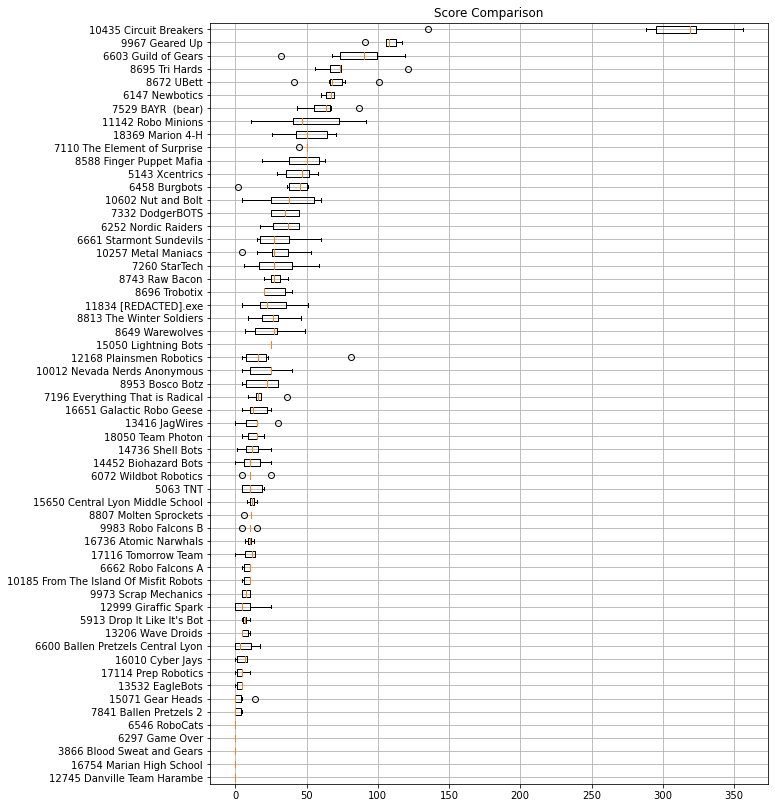

In [121]:
new = dict(sorted(iowa_scores.items(), key=lambda item: sum(item[1]) / len(item[1]) ))

graph_labels = []
graph_data = []
for key, value in new.items():
    graph_labels.append(key)
    graph_data.append(value)
    
fig = plt.figure(figsize=(10, 14))
ax = fig.add_subplot(111)

bp = ax.boxplot(graph_data, vert=0)

plt.title('Score Comparison')

ax.set_yticklabels(graph_labels)

ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

plt.grid()
plt.show()

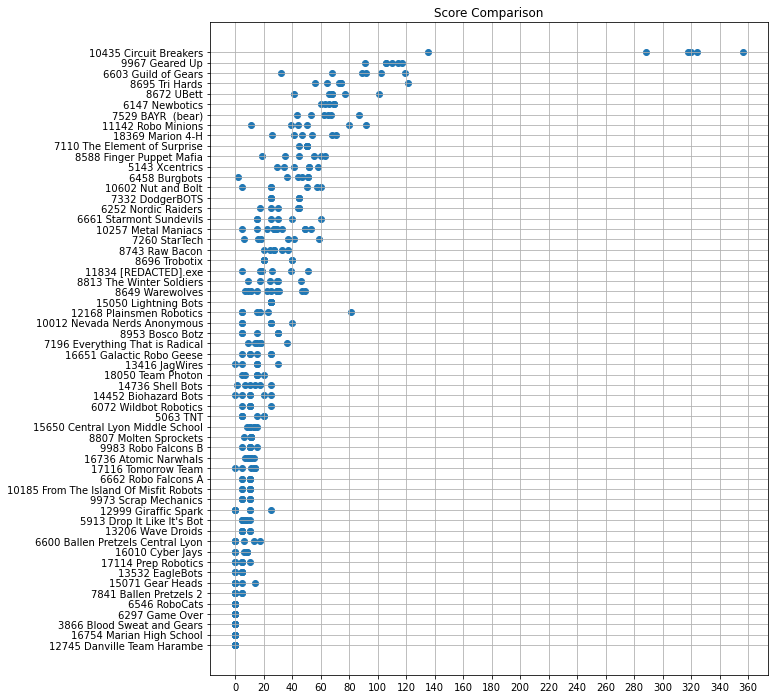

In [124]:
new = dict(sorted(iowa_scores.items(), key=lambda item: sum(item[1]) / len(item[1]) ))

fig = plt.figure(figsize=(10, 12))
ax = fig.add_subplot(111)

padding = 1
graph_labels = []
graph_data_x = []
graph_data_y = []
for i, (key, value) in enumerate(new.items()):
    graph_labels.append(key)
    for score in value:
        graph_data_x.append(score)
        graph_data_y.append(i * padding)

ax.scatter(graph_data_x, graph_data_y)

xaxis = [str(x) for x in range(0, max(graph_data_x)+20, 20)]
plt.xticks( [int(x) for x in xaxis], xaxis )

plt.yticks( range(len(graph_labels)), graph_labels)

plt.title('Score Comparison')
plt.grid()
plt.show()

In [213]:
### EDITABLE VARIABLES

# Maximum number of teams shown, -1 means unlimited; ~50 labels break; ~100 visuals break down unzoomed
limit = 50
# How far down to go before starting (from 1st place)
offset = 0

# 'IOWA' or 'GLOBAL' depending on which data set you want to view
iowa_or_global = 'GLOBAL'

### END OF EDITABLE VARIABLES

# Sort data by mean score
data = iowa_scores if iowa_or_global == 'IOWA' else global_scores
sorted_data = dict(sorted(data.items(), key=lambda item: sum(item[1]) / len(item[1]), reverse=1))

# Store data as ["team name", single_score]
pd_data = []
current = 0
for key, value in sorted_data.items():
    current += 1
    # Don't start before or go past limit
    if current <= offset: continue
    if current > offset + limit and limit != -1: break
    # Don't plot teams with score of 0
    average = int(sum(value) / len(value))
    if average == 0: break
    team_number = key.split(" ")[0]
    team_name = key.split(" ")[1:]
    key = f"{team_number} ({average}) {' '.join(team_name)}"[:30]
    for score in value:
        pd_data.append([key, score])
        
# Put data into a pandas dataframe with column names
df = pd.DataFrame(reversed(pd_data), columns=["Team Name", "Scores"])

# Plotting config
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

# Create an interactive box plot with team name vs scores color coded
fig = px.box(df, x="Team Name", y="Scores", color="Team Name")
fig.update_traces(line_width = 1.2)
fig.show()